# STARTING OF THE PROJECT

In [30]:
import  re
import pandas as pd
import emoji
from collections import Counter

### Reading the File

In [31]:
f= open('WhatsApp Chat with FRIENDS ZONE.txt','r',encoding='UTF-8')

In [32]:
data=f.read()

### Pattern For Date and Time

In [33]:
pattern = r'([0-9]+\/[0-9]+\/[0-9]+,\s[0-9]+:[0-9]+(?:\s(?:AM|PM|am|pm))?\s-\s)'

### Separating Messages and Time

In [34]:
msg_and_dates = re.split(pattern, data)
msg_and_dates = [part.strip() for part in msg_and_dates if part.strip()]


In [35]:
msgs = msg_and_dates[1::2]


In [36]:
dates = msg_and_dates[::2]
len(dates)

8009

### Creating DataFrame

In [37]:
df = pd.DataFrame({'user_messages': msgs, 'dates': dates})
df['dates'] = pd.to_datetime(df['dates'], format='%d/%m/%Y, %H:%M -')
df.rename(columns={'dates': 'date'}, inplace=True)
df.head()

,user_messages,date
0,Messages and calls are end-to-end encrypted. N...,2020-07-22 09:48:00
1,"Arpit Sahu created group ""Squad""",2020-07-22 09:48:00
2,Mohit Keshari: Hello my fans😍,2020-07-22 09:49:00
3,Krishna Maurya: Thank you Arpit,2020-07-22 09:49:00
4,Krishna Maurya: Tum kon,2020-07-22 09:49:00


In [38]:
df.shape


(8009, 2)

In [39]:
users =[]
messages=[]
for message in df['user_messages']:
    s=message
    s=s.split(":")
    if len(s)==2:
        spiltmessage=message.split(':')
        author=spiltmessage[0]
        m=' '.join(spiltmessage[1:])
        users.append(author)
        messages.append(m)
    else:
        users.append('group_notification')
        messages.append(message)

df['user']=users
df['messages']=messages
df.drop(columns=['user_messages'],inplace=True)
    

### Getting year, month, hour and minute from the date

In [40]:
year=df['date'].dt.year
month=df['date'].dt.month_name()
dates=df['date'].dt.day
hour=df['date'].dt.hour
minute=df['date'].dt.minute


In [41]:
df['day']=dates
df['month']=month
df['year']=year
df['hour']=hour
df['minute']=minute
df['only_date'] = df['date'].dt.date

In [42]:
df.head(100)


,date,user,messages,day,month,year,hour,minute,only_date
0,2020-07-22 09:48:00,group_notification,Messages and calls are end-to-end encrypted. N...,22,July,2020,9,48,2020-07-22
1,2020-07-22 09:48:00,group_notification,"Arpit Sahu created group ""Squad""",22,July,2020,9,48,2020-07-22
2,2020-07-22 09:49:00,Mohit Keshari,Hello my fans😍,22,July,2020,9,49,2020-07-22
3,2020-07-22 09:49:00,Krishna Maurya,Thank you Arpit,22,July,2020,9,49,2020-07-22
4,2020-07-22 09:49:00,Krishna Maurya,Tum kon,22,July,2020,9,49,2020-07-22
...,...,...,...,...,...,...,...,...,...
95,2020-07-22 13:47:00,Mohit Keshari,😕,22,July,2020,13,47,2020-07-22
96,2020-07-22 13:47:00,Krishna Maurya,Ise jyada deke hai,22,July,2020,13,47,2020-07-22
97,2020-07-22 13:48:00,Krishna Maurya,Aur roz dhkate hai,22,July,2020,13,48,2020-07-22
98,2020-07-22 13:48:00,Arpit sahu,<Media omitted>,22,July,2020,13,48,2020-07-22


### Total messages by a User

In [43]:
df[df['user']=='Mohit Keshari'].shape

(2446, 9)

### Total media shared by the users

In [44]:
words=[]
for msg in df['messages']:
    words.extend(msg.split())

In [45]:
df[df['messages'].str.contains('<Media omitted>')]

,date,user,messages,day,month,year,hour,minute,only_date
61,2020-07-22 10:11:00,Vaibhav khare,<Media omitted>,22,July,2020,10,11,2020-07-22
68,2020-07-22 13:05:00,Mohit Keshari,<Media omitted>,22,July,2020,13,5,2020-07-22
98,2020-07-22 13:48:00,Arpit sahu,<Media omitted>,22,July,2020,13,48,2020-07-22
138,2020-07-22 13:55:00,Mohit Keshari,<Media omitted>,22,July,2020,13,55,2020-07-22
145,2020-07-22 13:55:00,Mohit Keshari,<Media omitted>,22,July,2020,13,55,2020-07-22
...,...,...,...,...,...,...,...,...,...
8000,2024-01-26 12:34:00,Mohit Keshari,<Media omitted>,26,January,2024,12,34,2024-01-26
8001,2024-01-26 13:19:00,Ritik Verma,<Media omitted>,26,January,2024,13,19,2024-01-26
8002,2024-01-30 16:20:00,+91 87072 22162,<Media omitted>,30,January,2024,16,20,2024-01-30
8003,2024-01-30 16:21:00,Mohit Keshari,<Media omitted>,30,January,2024,16,21,2024-01-30


### Total URL shared by the users

In [46]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.messages.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
df.loc[df['urlcount']>0].shape[0]

111

### Total emoji shared by the users

In [47]:

def extract_emojis(text):
    emoji_pattern = re.compile("[\U00010000-\U0010ffff]")  # Unicode emoji range
    return emoji_pattern.findall(text)

df['emojis'] = df['messages'].apply(extract_emojis)


In [48]:
emojilen = sum(df['emojis'].str.len())
print(emojilen)

3260


In [49]:
df.head(50)

,date,user,messages,day,month,year,hour,minute,only_date,urlcount,emojis
0,2020-07-22 09:48:00,group_notification,Messages and calls are end-to-end encrypted. N...,22,July,2020,9,48,2020-07-22,0,[]
1,2020-07-22 09:48:00,group_notification,"Arpit Sahu created group ""Squad""",22,July,2020,9,48,2020-07-22,0,[]
2,2020-07-22 09:49:00,Mohit Keshari,Hello my fans😍,22,July,2020,9,49,2020-07-22,0,[😍]
3,2020-07-22 09:49:00,Krishna Maurya,Thank you Arpit,22,July,2020,9,49,2020-07-22,0,[]
4,2020-07-22 09:49:00,Krishna Maurya,Tum kon,22,July,2020,9,49,2020-07-22,0,[]
5,2020-07-22 09:49:00,Arpit sahu,Sb mere fan h,22,July,2020,9,49,2020-07-22,0,[]
6,2020-07-22 09:50:00,Arpit sahu,😂,22,July,2020,9,50,2020-07-22,0,[😂]
7,2020-07-22 09:50:00,Mohit Keshari,Bada batmeez fan h yrr,22,July,2020,9,50,2020-07-22,0,[]
8,2020-07-22 09:50:00,Krishna Maurya,Ooo,22,July,2020,9,50,2020-07-22,0,[]
9,2020-07-22 09:50:00,Mohit Keshari,Kon h tu,22,July,2020,9,50,2020-07-22,0,[]


### Summary by Date

In [50]:
days=df.groupby('only_date')['only_date'].count()
print(days)

only_date
2020-07-22    677
2020-07-23    445
2020-07-24    268
2020-07-25    664
2020-07-26    258
             ... 
2024-01-25     18
2024-01-26     20
2024-01-30      2
2024-02-15      2
2024-03-01      3
Name: only_date, Length: 289, dtype: int64


### Sumarry By Users

In [51]:
users=df.groupby('user')['user'].count()
print(users)

user
+91 87072 22162        960
Arpit sahu            1467
Krishna Maurya        1425
Mohit Keshari         2446
Ritik Verma            547
Vaibhav khare          997
group_notification     167
Name: user, dtype: int64


### Summary By Messages

In [52]:
message=df.groupby('user')['messages'].count()
print(message)

user
+91 87072 22162        960
Arpit sahu            1467
Krishna Maurya        1425
Mohit Keshari         2446
Ritik Verma            547
Vaibhav khare          997
group_notification     167
Name: messages, dtype: int64


## Data Visualisation

In [53]:
import matplotlib.pyplot as plt

### Whatsapp User with Messages

In [54]:
x=df['user'].value_counts().head()

In [55]:
name =x.index
count= x.values

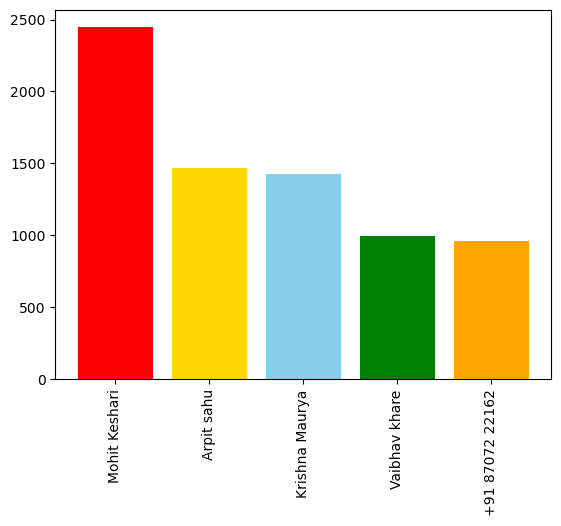

In [56]:
plt.bar(name,count,color =['red', 'gold', 'skyblue', 'green', 'orange'])
plt.xticks(rotation='vertical')
plt.show()

### Users And their messages in percentage

In [57]:
new_df=round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'index':'name','user':'percent'})

In [58]:
new_df

,name,percent
0,Mohit Keshari,30.54
1,Arpit sahu,18.32
2,Krishna Maurya,17.79
3,Vaibhav khare,12.45
4,+91 87072 22162,11.99
5,Ritik Verma,6.83
6,group_notification,2.09


### WordCloud

In [59]:
from wordcloud import WordCloud

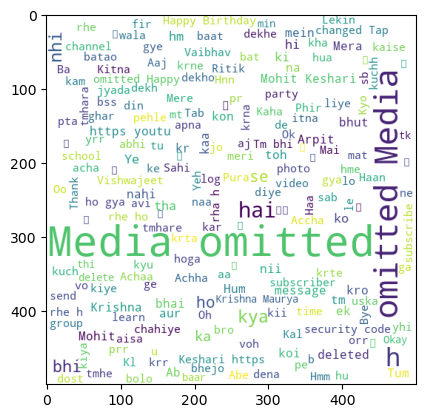

In [60]:
wc= WordCloud(height=500, width=500, min_font_size=10, background_color='white')
df_wc= wc.generate(df['messages'].str.cat(sep=" "))
fig, ax = plt.subplots()
ax.imshow(df_wc)

In [61]:
df['day_name'] = df['date'].dt.day_name()
df

,date,user,messages,day,month,year,hour,minute,only_date,urlcount,emojis,day_name
0,2020-07-22 09:48:00,group_notification,Messages and calls are end-to-end encrypted. N...,22,July,2020,9,48,2020-07-22,0,[],Wednesday
1,2020-07-22 09:48:00,group_notification,"Arpit Sahu created group ""Squad""",22,July,2020,9,48,2020-07-22,0,[],Wednesday
2,2020-07-22 09:49:00,Mohit Keshari,Hello my fans😍,22,July,2020,9,49,2020-07-22,0,[😍],Wednesday
3,2020-07-22 09:49:00,Krishna Maurya,Thank you Arpit,22,July,2020,9,49,2020-07-22,0,[],Wednesday
4,2020-07-22 09:49:00,Krishna Maurya,Tum kon,22,July,2020,9,49,2020-07-22,0,[],Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
8004,2024-02-15 23:34:00,group_notification,+91 87072 22162: https://www.facebook.com/prof...,15,February,2024,23,34,2024-02-15,1,[],Thursday
8005,2024-02-15 23:34:00,+91 87072 22162,🥹,15,February,2024,23,34,2024-02-15,0,[🥹],Thursday
8006,2024-03-01 10:05:00,group_notification,Mohit Keshari: *Holi Event Sorted Out!*🤩 \n...,1,March,2024,10,5,2024-03-01,2,"[🤩, 🌟, 🥳, 💥, 🎫, 💃, 🙋, 🎟, 🧸, 🥂, 🎸]",Friday
8007,2024-03-01 10:06:00,Mohit Keshari,Register krlo guys,1,March,2024,10,6,2024-03-01,0,[],Friday


### Filtering the Messages

In [62]:
temp= df[df['user']!='group_notification']


In [63]:
f = open('stop_hinglish.txt', 'r', encoding='utf-8')
stop_words = f.read()

In [64]:
words = []
for msg in temp['messages']:
    for word in msg.lower().split():
        if word not in stop_words and word != '<media' and word != 'omitted>':
            words.append(word)

### Total word count after filtering

In [65]:
most_df = pd.DataFrame(Counter(words).most_common(20))
most_df

,0,1
0,tm,127
1,nii,106
2,message,89
3,mohit,81
4,deleted,78
5,arpit,73
6,bhut,72
7,gya,68
8,gye,68
9,kro,66


### Distribution of Message Count Bar Chart

In [66]:
from collections import Counter
new_df=pd.DataFrame(Counter(words).most_common(20))

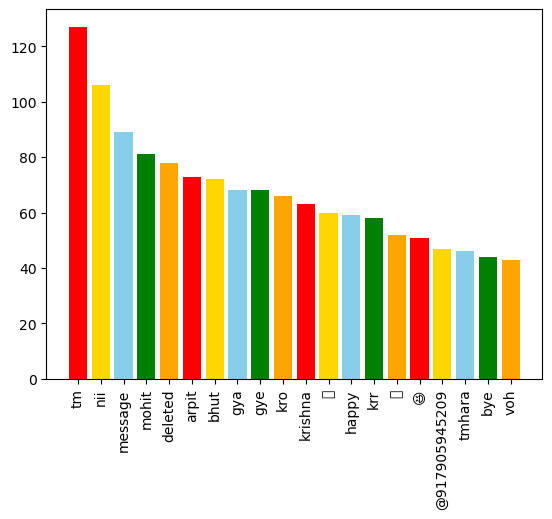

In [93]:
fig, ax=plt.subplots()
ax.bar(new_df[0],new_df[1], color=['red', 'gold', 'skyblue', 'green', 'orange'])
plt.xticks(rotation='vertical' )
plt.show()

### Distribution of Most Common Emoji

In [68]:
emoji = []
for msg in df['emojis']:
    emoji.extend(msg)
fem=pd.DataFrame(Counter(emoji).most_common(len(Counter(emoji))))

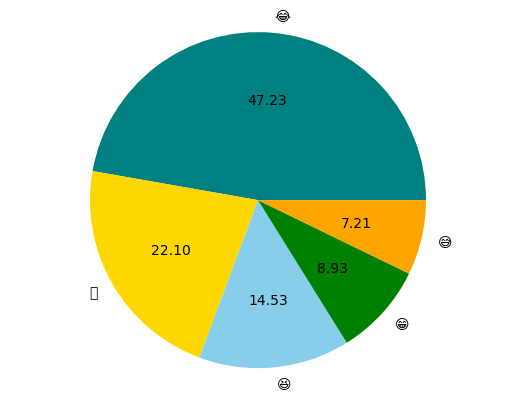

In [69]:
fig2, ax1 = plt.subplots()
ax1.pie(fem[1].head(), labels=fem[0].head(), autopct="%0.2f",colors = ['teal','gold','skyblue','green','orange','red','cyan','lime','orangered'])
ax1.axis('equal')  
plt.show()

### Most Active Weeks

In [70]:
mweek = pd.DataFrame(df['day_name'].value_counts())
mweek = mweek.reset_index()
mweek.columns = ["Day", "Counts"]

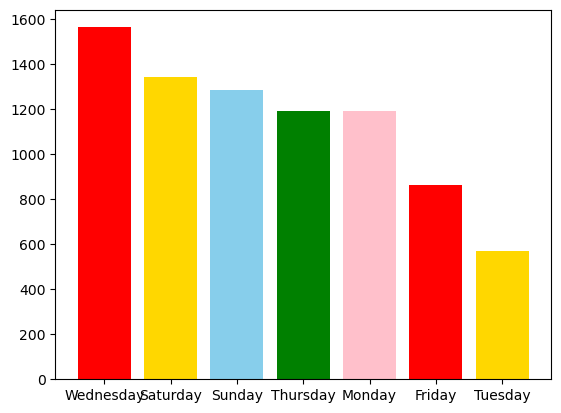

In [71]:
fig5, ax = plt.subplots()
ax.bar(mweek["Day"], mweek["Counts"], color=['red', 'gold', 'skyblue', 'green', 'pink'])
plt.show()

### Most Busy Month

In [72]:
mmonth = pd.DataFrame(df['month'].value_counts())
mmonth = mmonth.reset_index()
mmonth.columns = ["Month", "Counts"]

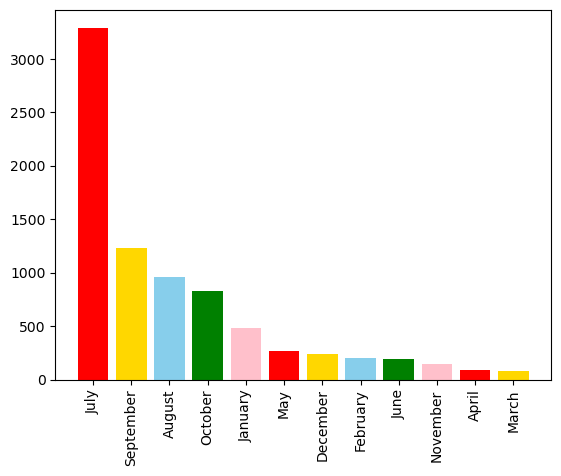

In [73]:
fig5, ax = plt.subplots()
ax.bar(mmonth["Month"], mmonth["Counts"], color=['red', 'gold', 'skyblue', 'green', 'pink'])
plt.xticks(rotation='vertical')
plt.show()

### Summary of busy months in every year

In [74]:
df['Month_Num']=df['date'].dt.month

In [75]:
df.groupby(['year', 'Month_Num']).count()['messages']

year  Month_Num
2020  7            2874
      8             686
      9            1154
      10            720
      11             12
      12            122
2021  1             353
      2              78
      3               2
      4               5
      5              87
      6              76
      7              33
      8             118
      9              27
      10              6
      11             92
      12             59
2022  1              22
      2              16
      4              54
      5             154
      6             120
      7             386
      8              79
      9              49
      10            100
      11             32
      12             47
2023  1              56
      2             110
      3              73
      4              27
      5              22
      7               1
      8              72
      10              7
      11              9
      12              9
2024  1              55
      2               2


In [76]:
temp = df[df['user'] != 'group_notification']
temp

,date,user,messages,day,month,year,hour,minute,only_date,urlcount,emojis,day_name,Month_Num
2,2020-07-22 09:49:00,Mohit Keshari,Hello my fans😍,22,July,2020,9,49,2020-07-22,0,[😍],Wednesday,7
3,2020-07-22 09:49:00,Krishna Maurya,Thank you Arpit,22,July,2020,9,49,2020-07-22,0,[],Wednesday,7
4,2020-07-22 09:49:00,Krishna Maurya,Tum kon,22,July,2020,9,49,2020-07-22,0,[],Wednesday,7
5,2020-07-22 09:49:00,Arpit sahu,Sb mere fan h,22,July,2020,9,49,2020-07-22,0,[],Wednesday,7
6,2020-07-22 09:50:00,Arpit sahu,😂,22,July,2020,9,50,2020-07-22,0,[😂],Wednesday,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8002,2024-01-30 16:20:00,+91 87072 22162,<Media omitted>,30,January,2024,16,20,2024-01-30,0,[],Tuesday,1
8003,2024-01-30 16:21:00,Mohit Keshari,<Media omitted>,30,January,2024,16,21,2024-01-30,0,[],Tuesday,1
8005,2024-02-15 23:34:00,+91 87072 22162,🥹,15,February,2024,23,34,2024-02-15,0,[🥹],Thursday,2
8007,2024-03-01 10:06:00,Mohit Keshari,Register krlo guys,1,March,2024,10,6,2024-03-01,0,[],Friday,3


### Most Busy User

In [77]:
musers = pd.DataFrame(temp['user'].value_counts())
musers= musers.reset_index()
musers.columns= ["Users", "Counts"]
musers

,Users,Counts
0,Mohit Keshari,2446
1,Arpit sahu,1467
2,Krishna Maurya,1425
3,Vaibhav khare,997
4,+91 87072 22162,960
5,Ritik Verma,547


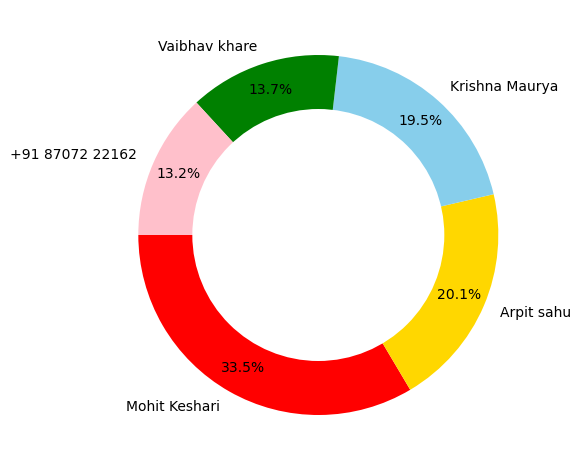

In [78]:
fig4, ax1 = plt.subplots()
ax1.pie(musers["Counts"].head(), labels=musers["Users"].head(), colors=['red', 'gold', 'skyblue', 'green', 'pink'], autopct='%1.1f%%', startangle=180, pctdistance=0.85 )
inner_circle = plt.Circle((0,0),0.70,fc='white')
fig4.gca().add_artist(inner_circle)
plt.tight_layout()
plt.show()


## Sentiment Analysis

In [79]:
def findsent(data):
    if data["positive"] >= data["negative"] and data["positive"] >= data["neutral"]:
        return 1
    if data["negative"] >= data["positive"] and data["negative"] >= data["neutral"]:
        return -1
    if data["neutral"] >= data["positive"] and data["neutral"] >= data["negative"]:
        return 0

In [86]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
data = df.dropna()
sentiments = SentimentIntensityAnalyzer()
data["positive"] = [sentiments.polarity_scores(message)["pos"] for message in data["messages"]]
data["negative"] = [sentiments.polarity_scores(message)["neg"] for message in data["messages"]]
data["neutral"] = [sentiments.polarity_scores(message)["neu"] for message in data["messages"]]
data["value"] = data.apply(lambda row: findsent(row), axis=1)
user_list = data['user'].unique().tolist()
user_list.sort()
user_list.insert(0, "Overall")

### Monthly Activity map(Positive)

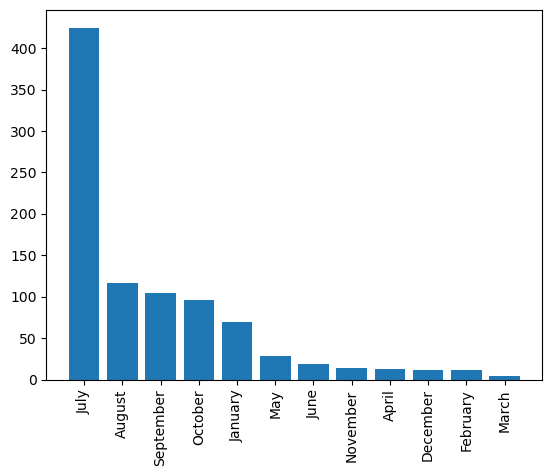

In [83]:
d1 = data[data['value'] == 1]
dcount = d1['month'].value_counts()
fig7, ax = plt.subplots()
ax.bar(dcount.index, dcount.values)
plt.xticks(rotation='vertical')
plt.show()

### Monthly Activity map(Neutral)

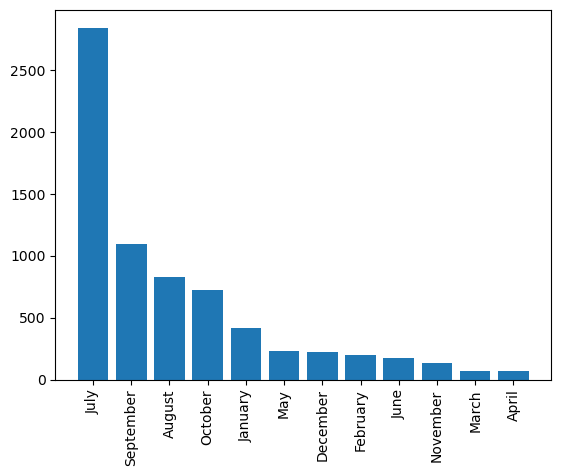

In [87]:
d1 = data[data['value'] == 0]
dcount = d1['month'].value_counts()
fig7, ax = plt.subplots()
ax.bar(dcount.index, dcount.values)
plt.xticks(rotation='vertical')
plt.show()

### Monthly Activity map(Negative)

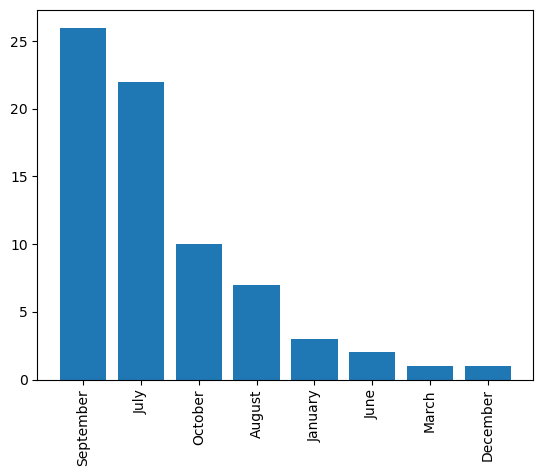

In [88]:
d1 = data[data['value'] == -1]
dcount = d1['month'].value_counts()
fig7, ax = plt.subplots()
ax.bar(dcount.index, dcount.values)
plt.xticks(rotation='vertical')
plt.show()

### Weekly Activity map(Positive)

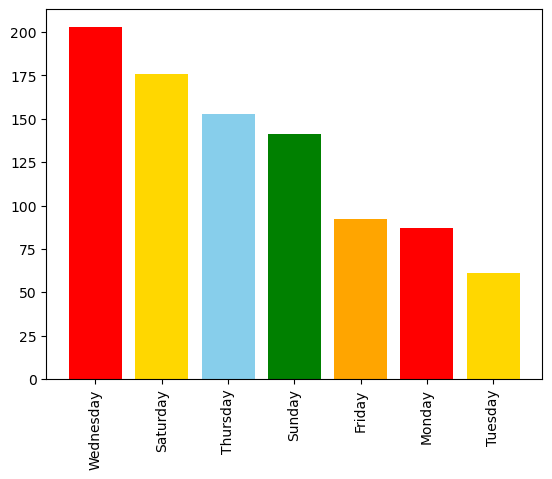

In [89]:
d1 = data[data['value'] == 1]
dcount = d1['day_name'].value_counts()
fig7, ax = plt.subplots()
ax.bar(dcount.index, dcount.values, color=['red', 'gold', 'skyblue', 'green', 'orange'])
plt.xticks(rotation='vertical')
plt.show()

### Weekly Activity map(Neutral)

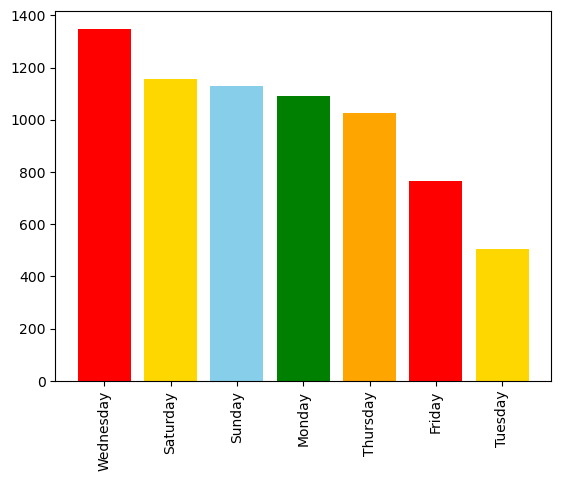

In [90]:
d1 = data[data['value'] == 0]
dcount = d1['day_name'].value_counts()
fig7, ax = plt.subplots()
ax.bar(dcount.index, dcount.values, color=['red', 'gold', 'skyblue', 'green', 'orange'])
plt.xticks(rotation='vertical')
plt.show()

### Weekly Activity map(Negative)

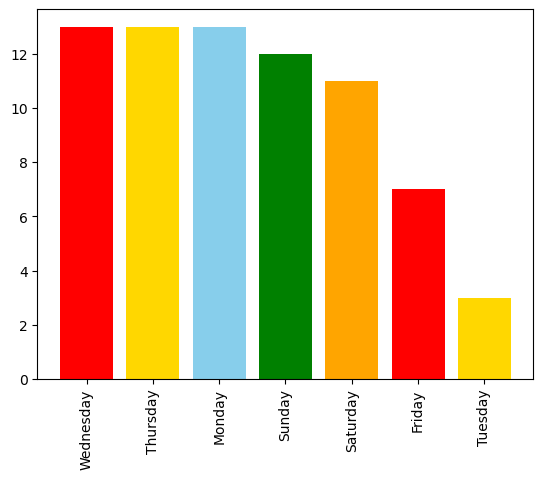

In [91]:
d1 = data[data['value'] == -1]
dcount = d1['day_name'].value_counts()
fig7, ax = plt.subplots()
ax.bar(dcount.index, dcount.values, color=['red', 'gold', 'skyblue', 'green', 'orange'])
plt.xticks(rotation='vertical')
plt.show()

In [96]:
def percentage(df,k):
    df = round((df['user'][df['value']==k].value_counts() / df[df['value']==k].shape[0]) * 100, 2).reset_index().rename(
        columns={'index': 'name', 'user': 'percent'})
    return df


,name,percent
0,Mohit Keshari,35.38
1,Krishna Maurya,20.59
2,Arpit sahu,20.37
3,Vaibhav khare,11.28
4,+91 87072 22162,9.53


## Percentage Distribution

### Postive

In [97]:
x = percentage(data, 1)
pt= pd.DataFrame(x)
pt.head(10)

,name,percent
0,Mohit Keshari,35.38
1,Krishna Maurya,20.59
2,Arpit sahu,20.37
3,Vaibhav khare,11.28
4,+91 87072 22162,9.53
5,Ritik Verma,2.52
6,group_notification,0.33


### Negative

In [98]:
x = percentage(data, -1)
pt= pd.DataFrame(x)
pt.head()

,name,percent
0,Krishna Maurya,34.72
1,Mohit Keshari,25.00
2,Arpit sahu,16.67
3,+91 87072 22162,12.50
4,Ritik Verma,6.94


### Neutral

In [100]:
x = percentage(data, 0)
pt= pd.DataFrame(x)
pt.head()

,name,percent
0,Mohit Keshari,29.97
1,Arpit sahu,18.07
2,Krishna Maurya,17.26
3,Vaibhav khare,12.69
4,+91 87072 22162,12.30


In [102]:
x = data['user'][data['value'] == 1].value_counts().head(10)
y = data['user'][data['value'] == -1].value_counts().head(10)
z = data['user'][data['value'] == 0].value_counts().head(10)

### Most Positve User

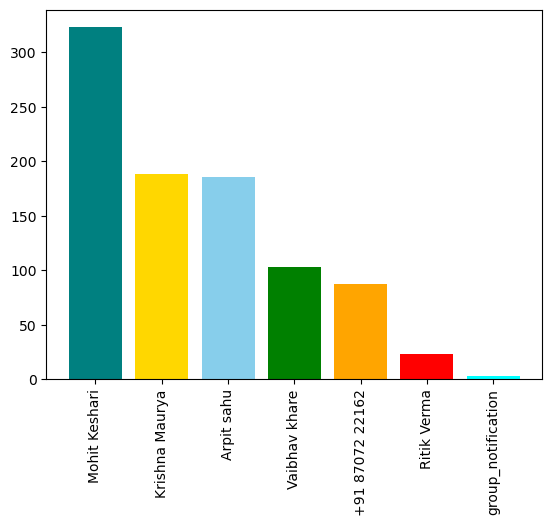

In [103]:
fig, ax = plt.subplots()
ax.bar(x.index, x.values, color=['teal', 'gold', 'skyblue', 'green', 'orange', 'red', 'cyan', 'lime'])
plt.xticks(rotation='vertical')
plt.show()

### Most Neutral User

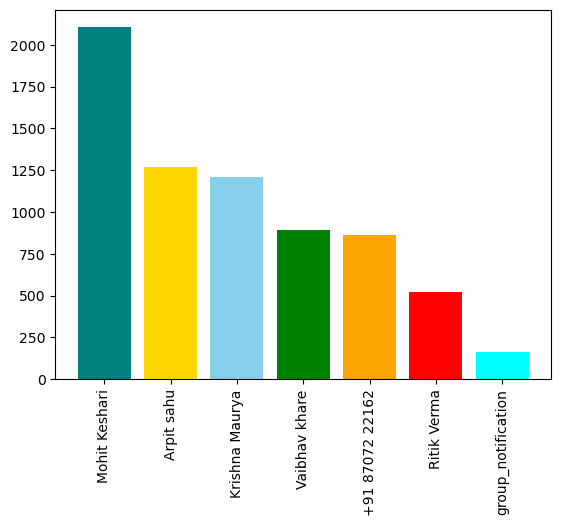

In [105]:
fig, ax = plt.subplots()
ax.bar(z.index, z.values, color=['teal', 'gold', 'skyblue', 'green', 'orange', 'red', 'cyan', 'lime'])
plt.xticks(rotation='vertical')
plt.show()

### Most Negative User

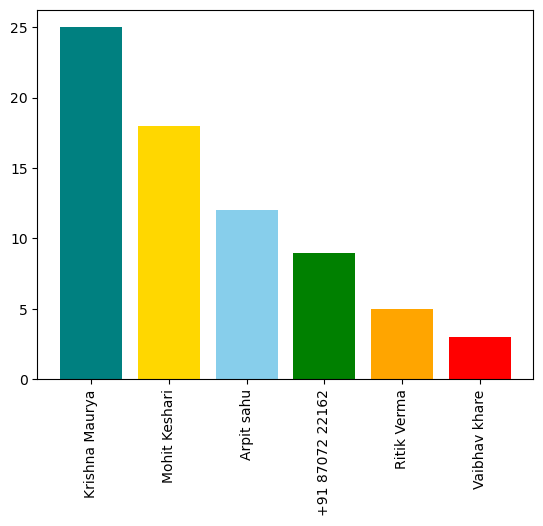

In [106]:
fig, ax = plt.subplots()
ax.bar(y.index, y.values, color=['teal', 'gold', 'skyblue', 'green', 'orange', 'red', 'cyan', 'lime'])
plt.xticks(rotation='vertical')
plt.show()

# The End